# Actividad 1

Autor: Nicolas Romero

Actividad para el topico de procesamiento de imagenes.

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

## Funciones

In [2]:
def showResults(template,image,result,loc,figureSize,tipo):

    x,y=loc
    if tipo == 1:
           fig,(ax1,ax2)=plt.subplots(2,figsize=figureSize,sharex=True,sharey=True)
    else:
        fig,(ax1,ax2)=plt.subplots(1,2,figsize=figureSize,sharex=True,sharey=True)

    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_axis_off()
    ax1.set_title('Imagen')


    hwally, wwally = template.shape
    rect=plt.Rectangle((x, y), wwally, hwally, edgecolor='r', facecolor='none')
    ax1.add_patch(rect)

    ax2.imshow(result)
    ax2.set_axis_off()
    ax2.set_title('Resultado match template')

    ax2.autoscale(False)
    ax2.plot(x,y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

    plt.show()


##  A. Seleccione una imagen al azar y encuentre a Wally

Se ocupa la imagen waldo4.jpg para buscar a Wally

(927, 1253)


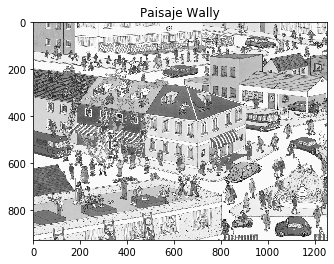

In [3]:
path = './images/'

image1 = cv2.imread(path+'waldo4.jpg',cv2.IMREAD_GRAYSCALE)
print(image1.shape)
plt.imshow(image1, cmap='gray')
plt.title('Paisaje Wally')
plt.show()

### Se obtiene el template a buscar en la imagen


(55, 40)


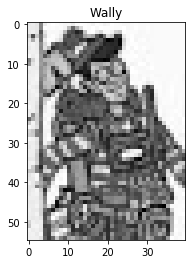

In [4]:
templateImage1 = image1[835:890,800:840]
print(templateImage1.shape)
plt.imshow(templateImage1, cmap='gray')
plt.title('Wally')
plt.show()

### Se aplica la tecnica de match template y se muestra el resultado obtenido

Text(0.5, 1.0, 'Resultado match template')

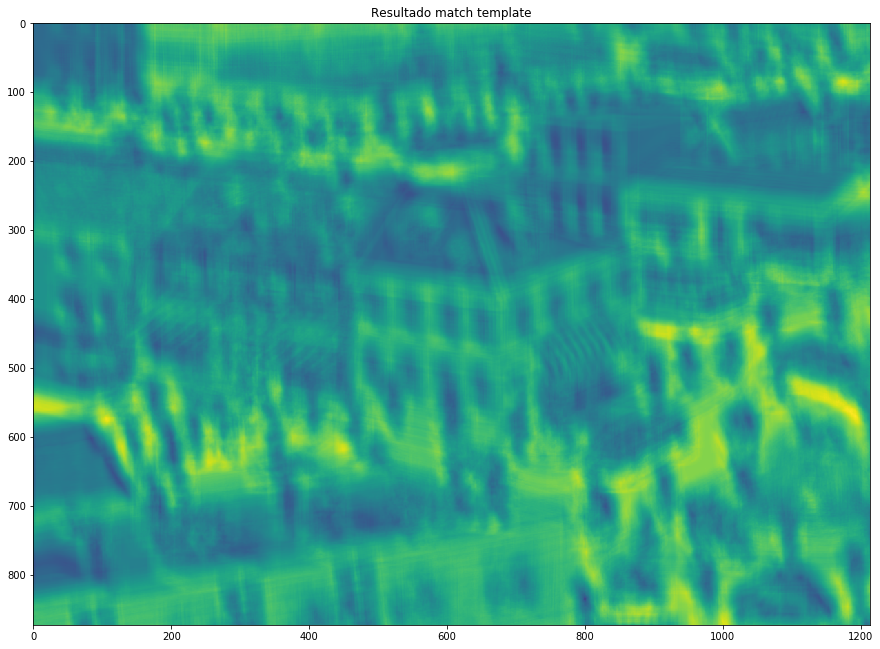

In [5]:
result1 = cv2.matchTemplate(image1, templateImage1, cv2.TM_SQDIFF)
(minVal1, _, minLoc1, _) = cv2.minMaxLoc(result1)
plt.figure(figsize=(15,15))
plt.imshow(result1)
plt.title("Resultado match template")


### Semuestran los resultados marcados en rojo

Se marca el wally encontrado en la parte inferior central de la imagen

(800, 835)


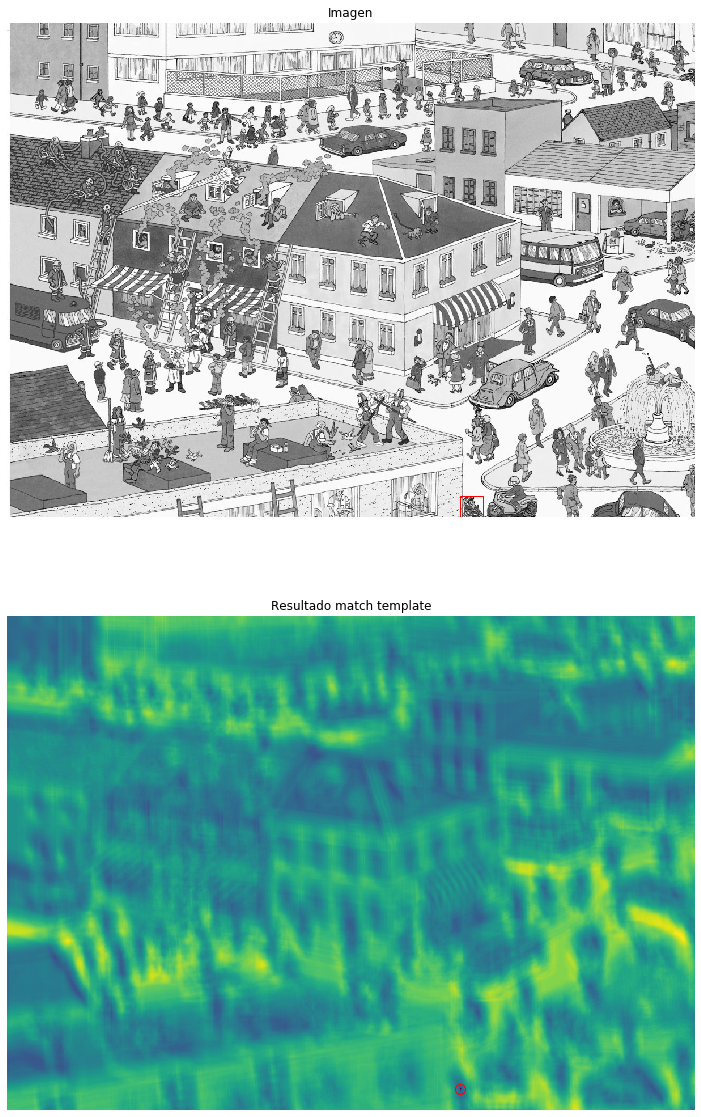

In [6]:
print(minLoc1)
showResults(templateImage1,image1,result1,minLoc1,(20,20),1)

## B. Seleccionar 3 imagenes, redimensionarlas, concatenarlas horizontalmente y encontrar a Wally

### Se eligen 3 imagenes se abren y se concatenan

(960, 671)
(1020, 671)
(896, 671)
(671, 2876)


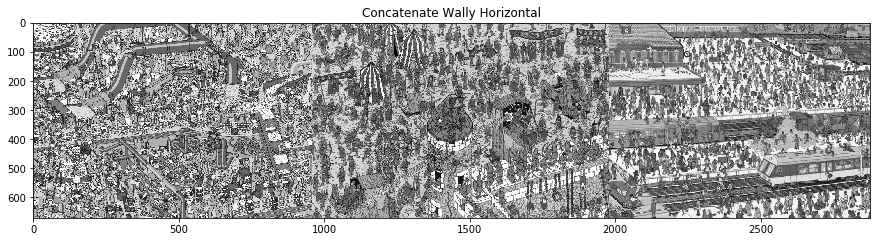

In [7]:
imageHorizontal1 = cv2.imread(path+'waldo5.jpg',cv2.IMREAD_GRAYSCALE)
imageHorizontal2 = cv2.imread(path+'waldo6.jpg',cv2.IMREAD_GRAYSCALE)
imageHorizontal3 = cv2.imread(path+'waldo10.jpg',cv2.IMREAD_GRAYSCALE)

imagesHorizontal = [imageHorizontal1,imageHorizontal2,imageHorizontal3]

sizeh,sizew = imagesHorizontal[0].shape
for i in range(3):
    r = sizeh/float(imagesHorizontal[i].shape[0])
    dim = (int(imagesHorizontal[i].shape[1]*r),sizeh)
    print(dim)
    imagesHorizontal[i]= cv2.resize(imagesHorizontal[i], dim, interpolation=cv2.INTER_AREA)


conHorizontal = np.concatenate((imagesHorizontal[0],imagesHorizontal[1],imagesHorizontal[2]),axis=1)
print(conHorizontal.shape)

fig = plt.figure(figsize=(15,15))

plt.imshow(conHorizontal,cmap='gray')
plt.title('Concatenate Wally Horizontal')
plt.show()



### Se obtiene el template a buscar

(25, 25)


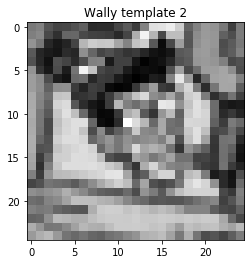

In [8]:
templateImage2 = conHorizontal[230:255,1650:1675]
print(templateImage2.shape)
plt.imshow(templateImage2, cmap='gray')
plt.title('Wally template 2')

plt.show()

### Se aplica la tecnica de match template y se muestra el resultado obtenido

Text(0.5, 1.0, 'Resultado match template 2')

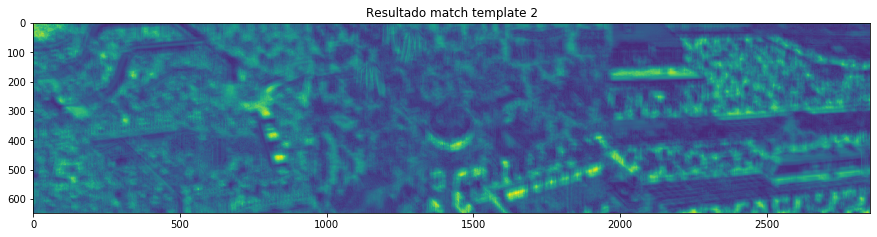

In [9]:
result2 = cv2.matchTemplate(conHorizontal, templateImage2, cv2.TM_SQDIFF)
(minVal2, _, minLoc2, _) = cv2.minMaxLoc(result2)
plt.figure(figsize=(15,15))
plt.imshow(result2)

plt.title("Resultado match template 2")

### Se muestran los resultados obtenidos marcados en rojo

(1650, 230)


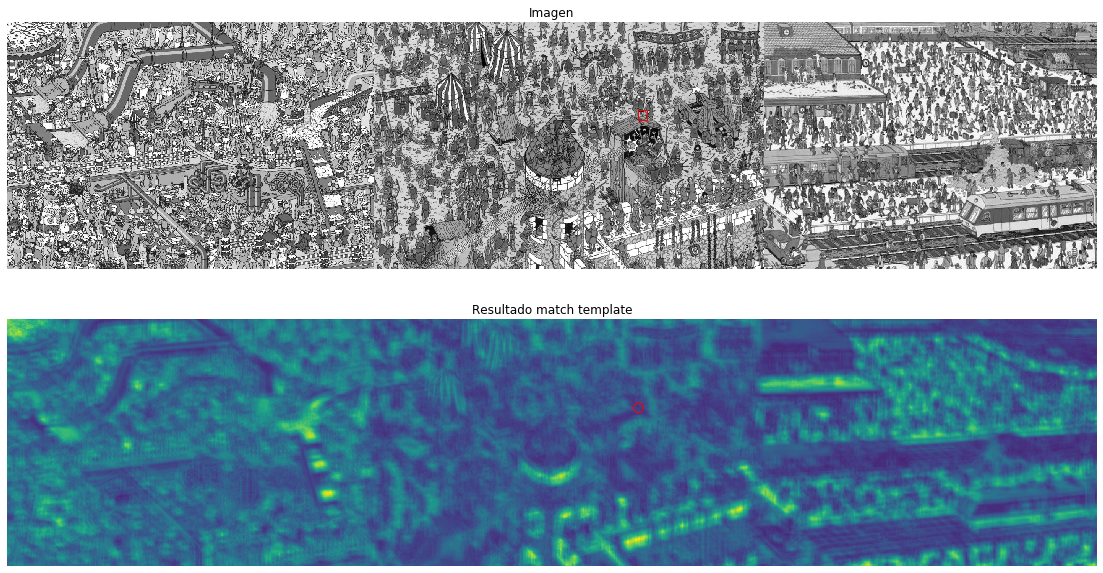

In [10]:
print(minLoc2)
showResults(templateImage2,conHorizontal,result2,minLoc2,(20,10),1)

## C. Seleccionar 3 imagenes, redimensionarlas, concatenarlas verticalmente y encontrar a Wally

### Se eligen 3 imagenes se abren y se concatenan

(1024, 768)
(1024, 768)
(1024, 768)
(2304, 1024)


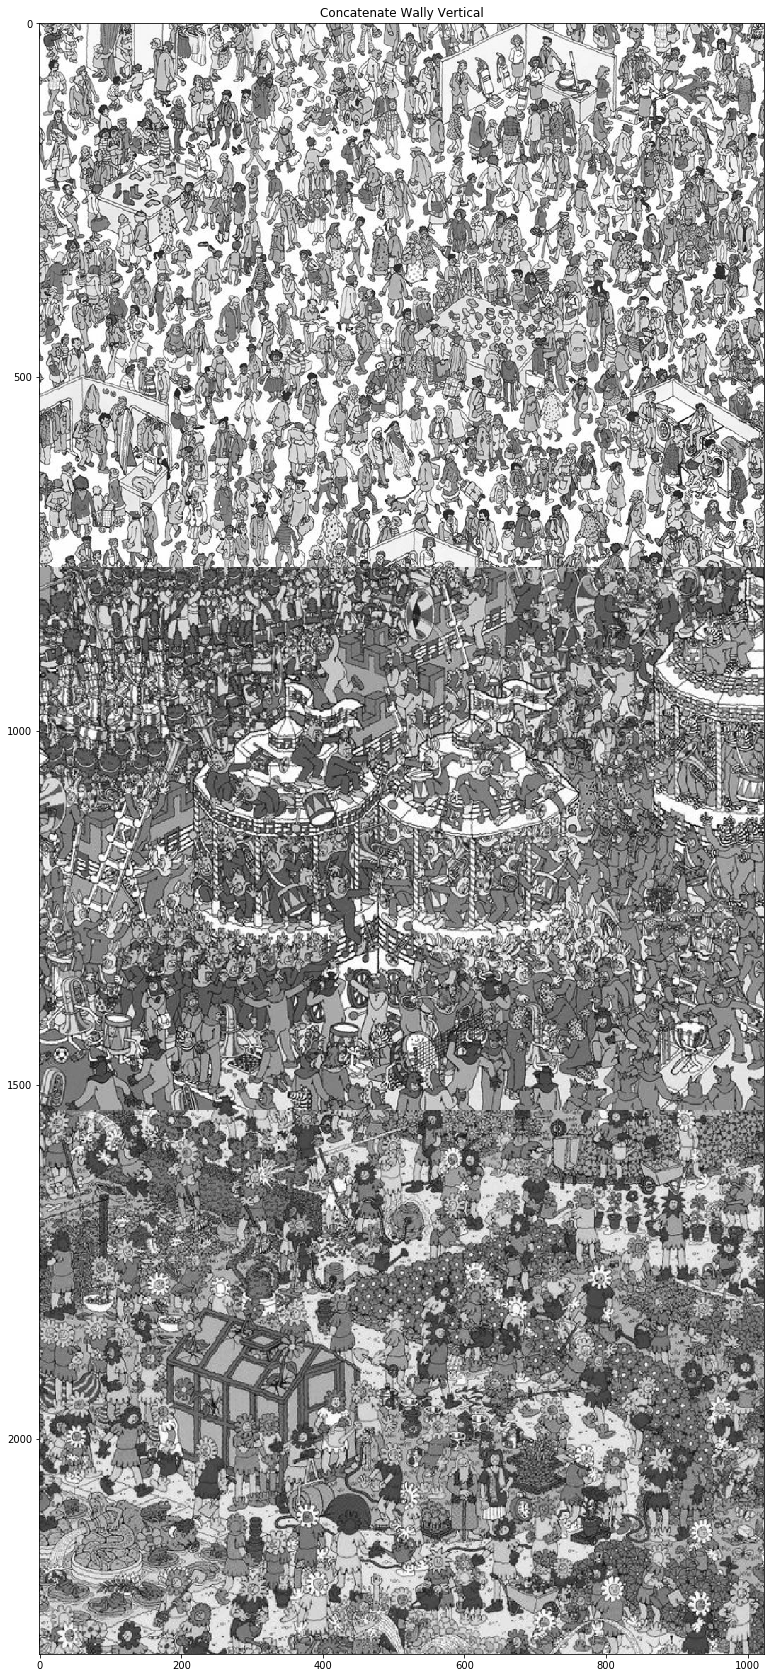

In [11]:
imageVertical1 = cv2.imread(path+'waldo11.jpg',cv2.IMREAD_GRAYSCALE)
imageVertical2 = cv2.imread(path+'waldo12.jpg',cv2.IMREAD_GRAYSCALE)
imageVertical3 = cv2.imread(path+'waldo13.jpg',cv2.IMREAD_GRAYSCALE)

imagesVertical = [imageVertical1,imageVertical2,imageVertical3]

sizeh,sizew = imagesVertical[0].shape
for i in range(3):
    r = sizew/float(imagesVertical[i].shape[1])
    dim = (sizew,int(imagesVertical[i].shape[0]*r))
    print(dim)
    imagesVertical[i]= cv2.resize(imagesVertical[i], dim, interpolation=cv2.INTER_AREA)


conVertical = np.concatenate((imagesVertical[0],imagesVertical[1],imagesVertical[2]),axis=0)
print(conVertical.shape)

fig = plt.figure(figsize=(30,30))

plt.imshow(conVertical,cmap='gray')
plt.title('Concatenate Wally Vertical')
plt.show()


### Se obtiene el template a buscar

(50, 30)


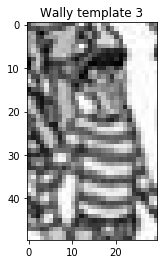

In [12]:
templateImage3 = conVertical[140:190,160:190]
print(templateImage3.shape)
plt.imshow(templateImage3, cmap='gray')
plt.title('Wally template 3')

plt.show()

### Se aplica la tecnica de match template y se muestra el resultado obtenido

Text(0.5, 1.0, 'Resultado match template 3')

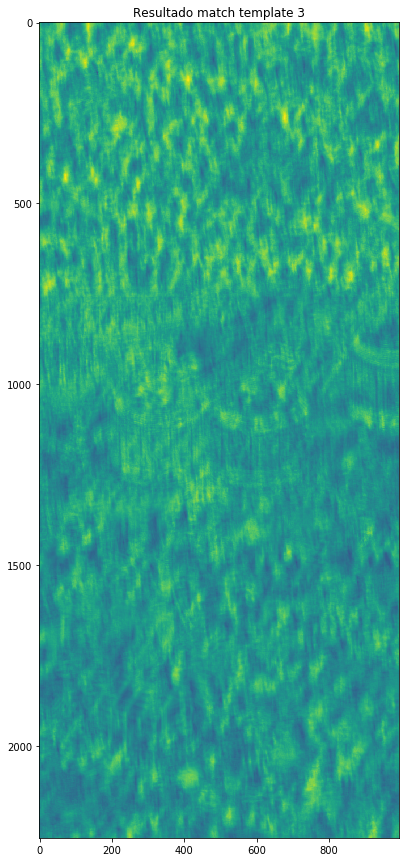

In [13]:
result3 = cv2.matchTemplate(conVertical, templateImage3, cv2.TM_SQDIFF)
(minVal3, _, minLoc3, _) = cv2.minMaxLoc(result3)
plt.figure(figsize=(15,15))
plt.imshow(result3)

plt.title("Resultado match template 3")

### Se muestran los resultados obtenidos

In [ ]:
print(minLoc3)
showResults(templateImage3,conVertical,result3,minLoc3,(30,60),2)

(160, 140)


## D. Usar las 6 imagenes del punto B y C, fusionarlas y encontrar a Wally usanto "template matching"

### Se concatenan verticalmente las imagenes que antes habian sido concatenadas horizontalmente, para luego poder concatenarlas con las otras imagenes en vertical

In [ ]:
sizeh,sizew = imagesHorizontal[0].shape
imagesVertical2 = [0,0,0]
for i in range(3):
    r = sizew/float(imagesHorizontal[i].shape[1])
    dim = (sizew,int(imagesHorizontal[i].shape[0]*r))
    print(dim)
    imagesVertical2[i]= cv2.resize(imagesHorizontal[i], dim, interpolation=cv2.INTER_AREA)


conVertical2 = np.concatenate((imagesVertical2[0],imagesVertical2[1],imagesVertical2[2]),axis=0)
print(conVertical2.shape)

fig = plt.figure(figsize=(30,30))

plt.imshow(conVertical2,cmap='gray')
plt.title('Concatenate Wally Vertical 2')
plt.show()

### Se concatenan las imagenes en vertical

In [ ]:
sizeh,sizew = conVertical.shape
imagesVertical3 = [conVertical,conVertical2]
for i in range(2):
    r = sizeh/float(imagesVertical3[i].shape[0])
    dim = (int(imagesVertical3[i].shape[1]*r),sizeh)
    print(dim)
    imagesVertical3[i]= cv2.resize(imagesVertical3[i], dim, interpolation=cv2.INTER_AREA)


conVertical3 = np.concatenate((imagesVertical3[0],imagesVertical3[1]),axis=1)
print(conVertical3.shape)

fig = plt.figure(figsize=(30,30))

plt.imshow(conVertical3,cmap='gray')
plt.title('Concatenate Wally Vertical 3')
plt.show()

### Se obtiene el template a buscar

In [ ]:
templateImage4 = conVertical3[1560:1600,570:620]
print(templateImage4.shape)
plt.imshow(templateImage4, cmap='gray')
plt.title('Wally template 4')

plt.show()

### Se aplica la tecnica de match template y se muestra el resultado

In [ ]:
result4 = cv2.matchTemplate(conVertical3, templateImage4, cv2.TM_SQDIFF)
(minVal4, _, minLoc4, _) = cv2.minMaxLoc(result4)
plt.figure(figsize=(15,15))
plt.imshow(result4)

plt.title("Resultado match template 4")

### Se muestran los resultados obtenidos marcados con la posicion encontrada

In [ ]:
print(minLoc4)
showResults(templateImage4,conVertical3,result4,minLoc4,(30,60),1)